# 데이터 시각화


In [1]:
'''
from google.colab import drive
drive.mount('/content/drive)
'''


'/content'

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [59]:
import pandas as pd

# 데이터프레임 생성
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = pd.DataFrame(data=data, columns=columns)
df.info()

df2 = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes


In [60]:
def rm_comma(x):
  return int(x.replace(',', '')) #df단위가 아니라 들어온 특정 대상만 처리하는 함수

df['03/02'] = df['03/02'].apply(rm_comma) #를 각 열에 할당한다.
df['03/03'] = df['03/03'].apply(rm_comma)

df
# 좀 단순하게 생각할 필요가 있다.

,03/02,03/03,03/04
0,1000,1100,"1,510"
1,1410,1420,"1,790"
2,850,900,"1,185"


In [61]:
def df_toint(dfs, day_list):
  for day in day_list:
    dfs[day] = dfs[day].apply(rm_comma)

day_list = ['03/02', '03/04']
df_toint(df2, day_list)
df2

,03/02,03/03,03/04
0,1000,"1,100",1510
1,1410,"1,420",1790
2,850,900,1185


In [49]:
df

,03/02,03/03,03/04
0,1000,1100,"1,510"
1,1410,1420,"1,790"
2,850,900,"1,185"


In [65]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/'

estate = pd.read_csv(DATA_PATH + "seoul_real_estate.csv",index_col=False)
estate.head(5)

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

print(sns.__version__)

0.13.1


In [74]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

df = pd.DataFrame({
    'date': dates,
    'min_temperature': min_temperature,
    'max_temperature': max_temperature
})

df.head(3)

,date,min_temperature,max_temperature
0,2021-01-01,20.7,34.7
1,2021-01-02,17.9,28.9
2,2021-01-03,18.8,31.8


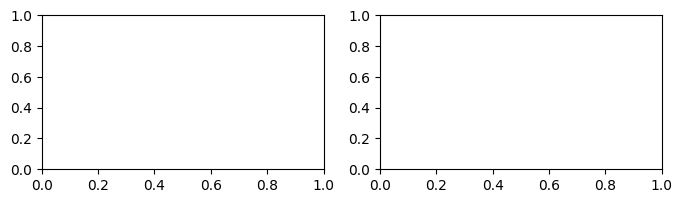

In [88]:
# 시각화의 핵심이자 인스턴스, 객체지향적 코딩,매우 중요함!!!

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,2))
plt.show()

In [84]:
print(type(ax))

<class 'numpy.ndarray'>


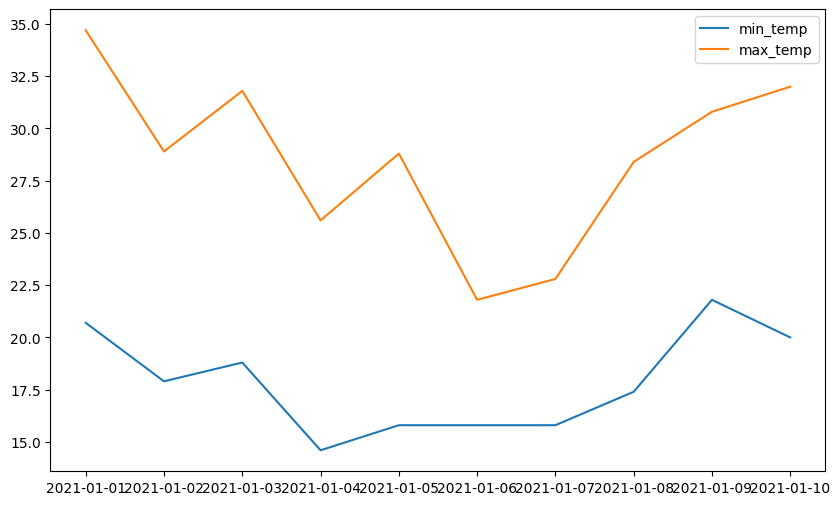

In [96]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))

ax.plot(dates, min_temperature, label = "min_temp")
ax.plot(dates, max_temperature, label = "max_temp")
ax.legend()
plt.show()

#하나하나가 다 독립적인 인스턴스

## Yahoo Live chart
- 야후에서 제공하는 무료 API**활용**

In [106]:
import yfinance as yf
data = yf.download("AMD", start = '2022-01-01', end = '2024-09-30')

[*********************100%***********************]  1 of 1 completed


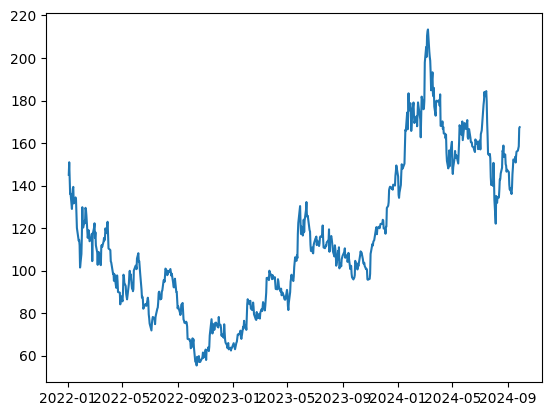

In [108]:
fig, ax = plt.subplots()
ax.plot(data['Open'])

plt.show()

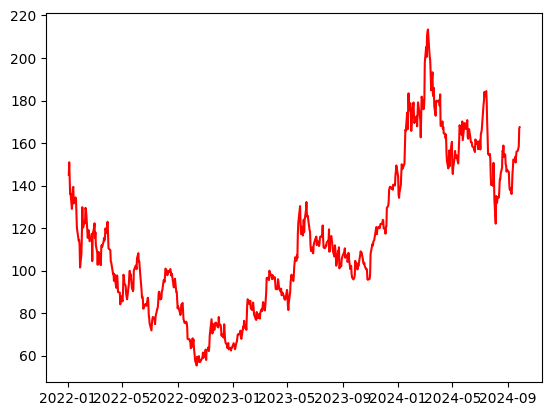

In [114]:
data2 = data.copy()

data2 = data.reset_index()
data2.head(1)

fig, ax = plt.subplots() #표 객체 생성
ax.plot(data2['Date'], data2['Open'], color = 'red')
plt.show()

[*********************100%***********************]  1 of 1 completed


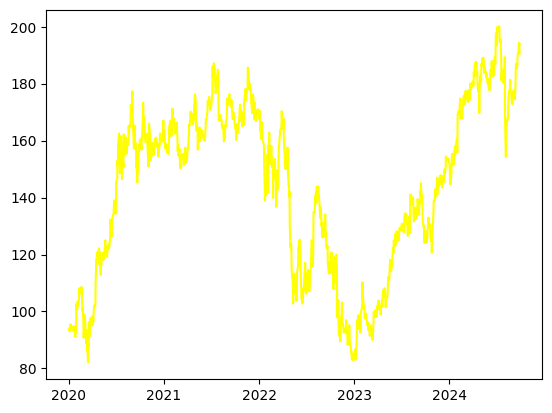

In [139]:
data_amzn = yf.download("AMZN", start = '2020-01-01', end = '2024-09-30')
data_amzn = data_amzn.reset_index()

fig, ax = plt.subplots()
ax.plot(data_amzn['Date'], data_amzn['Open'], color = 'yellow')
plt.show()

In [140]:
data_amd = yf.download("AMD", start = '2020-01-01', end = '2024-09-30')
data_amzn = yf.download("AMZN", start = '2020-01-01', end = '2024-09-30')

data_amd = data_amd.reset_index()
data_amzn = data_amzn.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


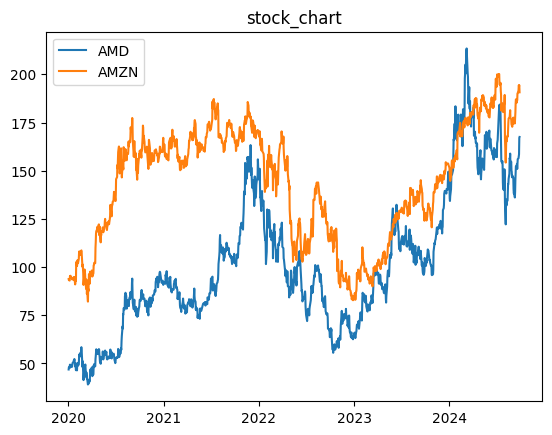

In [150]:
fig, ax = plt.subplots()

ax.plot(data_amd['Date'],data_amd['Open'], label = 'AMD')
ax.plot(data_amzn['Date'],data_amzn['Open'], label = 'AMZN')
ax.set_title("stock_chart")
ax.legend()
plt.show()

## 분할

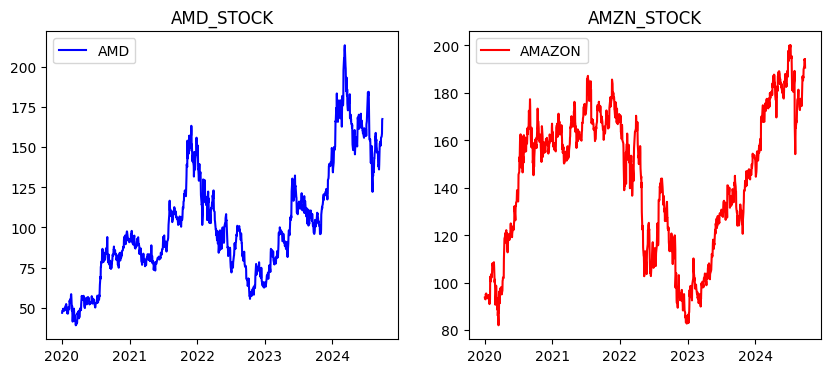

In [155]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

ax[0].set_title("AMD_STOCK")
ax[1].set_title("AMZN_STOCK")

ax[0].plot(data_amd['Date'],data_amd['Open'], label = 'AMD', color = 'blue')
ax[1].plot(data_amzn['Date'],data_amzn['Open'], label = 'AMAZON', color = 'red')

ax[0].legend()
ax[1].legend()
plt.show()

In [175]:
data1 = yf.download("BA", start = '2020-01-01', end = '2024-09-30')
data2 = yf.download("NKE", start = '2020-01-01', end = '2024-09-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


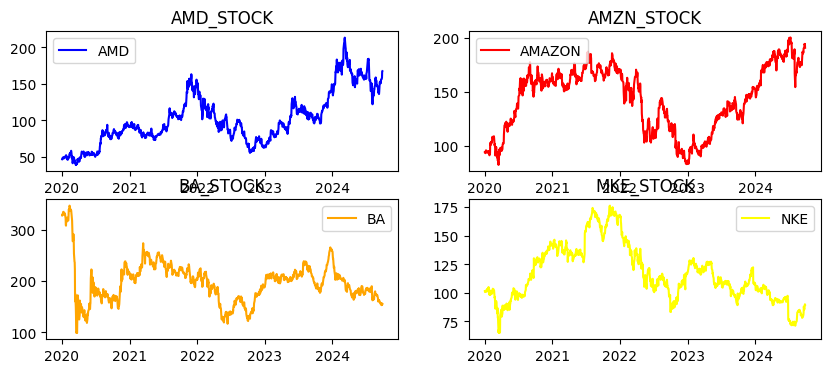

In [177]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,4))

ax[0,0].set_title("AMD_STOCK")
ax[0,1].set_title("AMZN_STOCK")
ax[1,0].set_title("BA_STOCK")
ax[1,1].set_title("MKE_STOCK")

ax[0,0].plot(data_amd['Date'],data_amd['Open'], label = 'AMD', color = 'blue')
ax[0,1].plot(data_amzn['Date'],data_amzn['Open'], label = 'AMAZON', color = 'red')
ax[1,0].plot(data1['Open'], label = 'BA', color = 'orange')
ax[1,1].plot(data2['Open'], label = 'NKE', color = 'yellow')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.savefig('myStock.png')
plt.show()

# seaborn 활용해서 시각화하기

<Axes: xlabel='Date', ylabel='Open'>

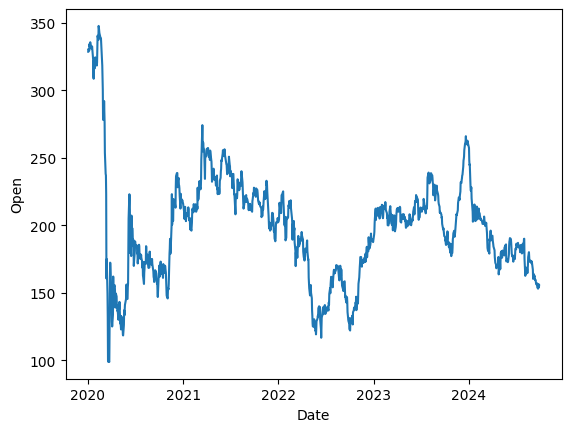

In [178]:
sns.lineplot(data1['Open'])

In [179]:
data_ba = data1.reset_index()
data_ba.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,328.549988,333.350006,327.700012,333.320007,331.348572,4544400
1,2020-01-03,330.630005,334.890015,330.299988,332.760010,330.791901,3875900
2,2020-01-06,329.299988,334.859985,327.880005,333.739990,331.766083,5355000
3,2020-01-07,334.260010,344.190002,330.709991,337.279999,335.285156,9898600
4,2020-01-08,332.399994,334.029999,329.600006,331.369995,329.410095,8239200


<Axes: xlabel='Date', ylabel='Open'>

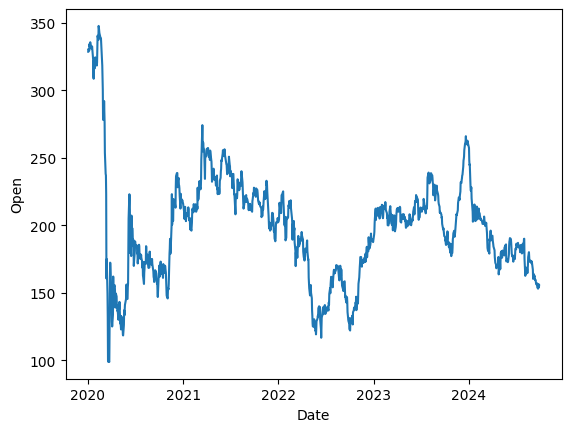

In [180]:
sns.lineplot(data = data_ba, x = 'Date', y = 'Open') #ggplt2와 사용방식이 똑같다.

### ax의 활용

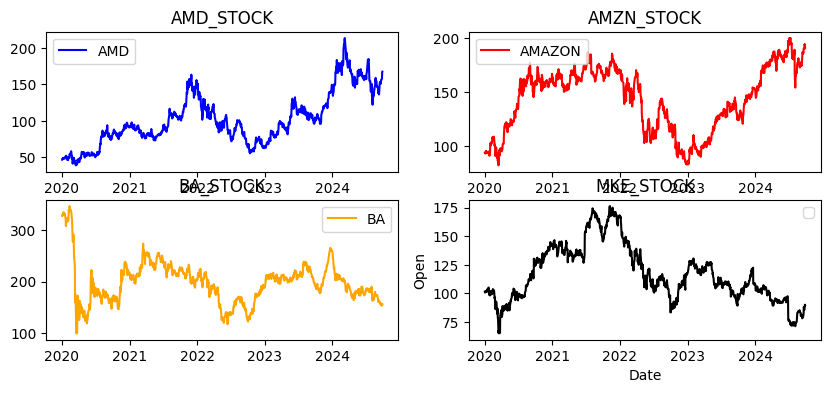

In [182]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,4))

ax[0,0].set_title("AMD_STOCK")
ax[0,1].set_title("AMZN_STOCK")
ax[1,0].set_title("BA_STOCK")
ax[1,1].set_title("MKE_STOCK")

ax[0,0].plot(data_amd['Date'],data_amd['Open'], label = 'AMD', color = 'blue')
ax[0,1].plot(data_amzn['Date'],data_amzn['Open'], label = 'AMAZON', color = 'red')
ax[1,0].plot(data1['Open'], label = 'BA', color = 'orange')
sns.lineplot(data = data2, x = 'Date', y = 'Open', ax = ax[1,1], color = "black")

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.savefig('myStock.png')
plt.show()

# 코랩에서 한글폰트 사용하기

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


### 연습문제

## 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : matplotlib.pyplot.bar
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.

In [9]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/'

estate = pd.read_csv(DATA_PATH + "seoul_real_estate.csv",index_col=False)
estate.head(1)

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구


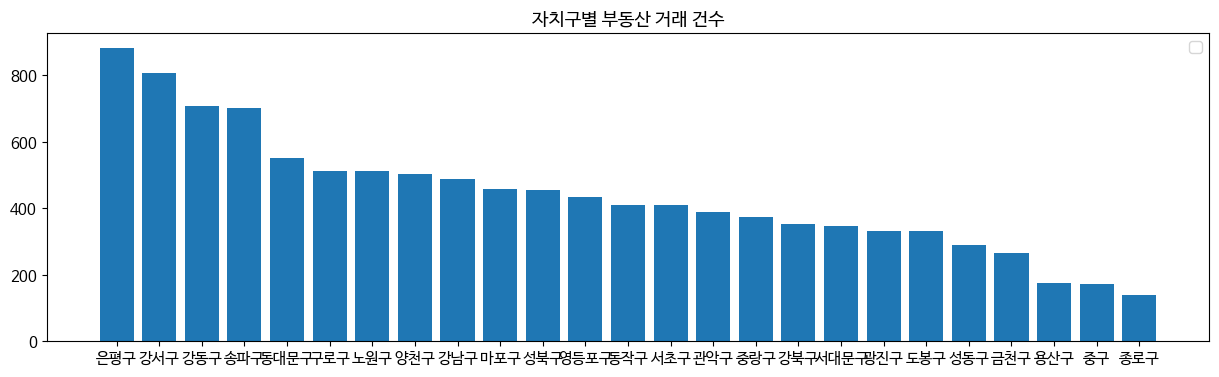

In [68]:
data_SGG = estate['SGG_NM'].value_counts()
dat_liv = list(data_SGG.index)
dat_count = list(data_SGG.values)

fig, ax = plt.subplots(figsize = (15,4))
#sns.barplot(data_SGG, label = 'SGG_NM' ,color = 'red')

ax.bar(dat_liv,dat_count)
ax.legend()
ax.set_title("자치구별 부동산 거래 건수")
plt.show()


## 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- matplotlib.pyplot.scatt

In [27]:
estate['BLDG_AREA'].head(4)
estate['BLDG_AREA'].head(4)

,BLDG_AREA
0,38.81
1,24.76
2,17.81
3,39.67


In [28]:
estate['OBJ_AMT'].head(4)

,OBJ_AMT
0,38500
1,17200
2,12000
3,45000


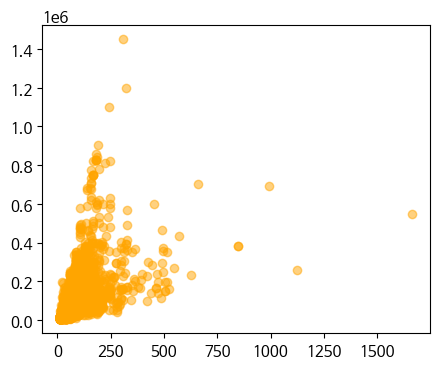

In [71]:
fig, ax = plt.subplots(figsize = (5,4))

ax.scatter(estate['BLDG_AREA'], estate['OBJ_AMT'], alpha = 0.5 ,color = 'orange')
plt.show()

In [73]:
# 위 표의 색깔을 '일부분만' 바꾸고 싶다면?

high_vals = estate['BLDG_AREA'] >= 900
estate['BLDG_AREA'][high_vals], estate['OBJ_AMT'][high_vals]

(2796     1125.97
 4331      994.89
 10451    1664.83
 Name: BLDG_AREA, dtype: float64,
 2796     260000
 4331     690000
 10451    545000
 Name: OBJ_AMT, dtype: int64)

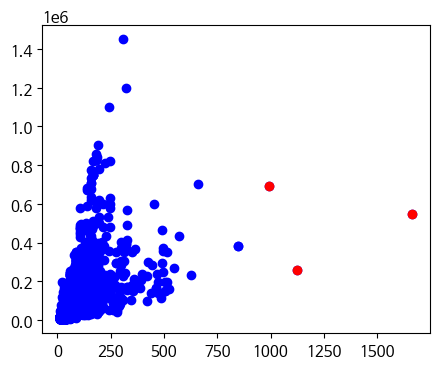

In [77]:
fig, ax = plt.subplots(figsize = (5,4))

ax.scatter(estate['BLDG_AREA'], estate["OBJ_AMT"], color = 'blue') #기본이 되는 산점도 그리기
ax.scatter(estate['BLDG_AREA'][high_vals], estate["OBJ_AMT"][high_vals], color = 'red') #색깔 바꿀 부분만 다른 색으로 지정 후 보이기
plt.show()

## 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : seaborn.barplot
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.

## 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- sns.scatterplot

<ipython-input-111-01079e8c7561>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)


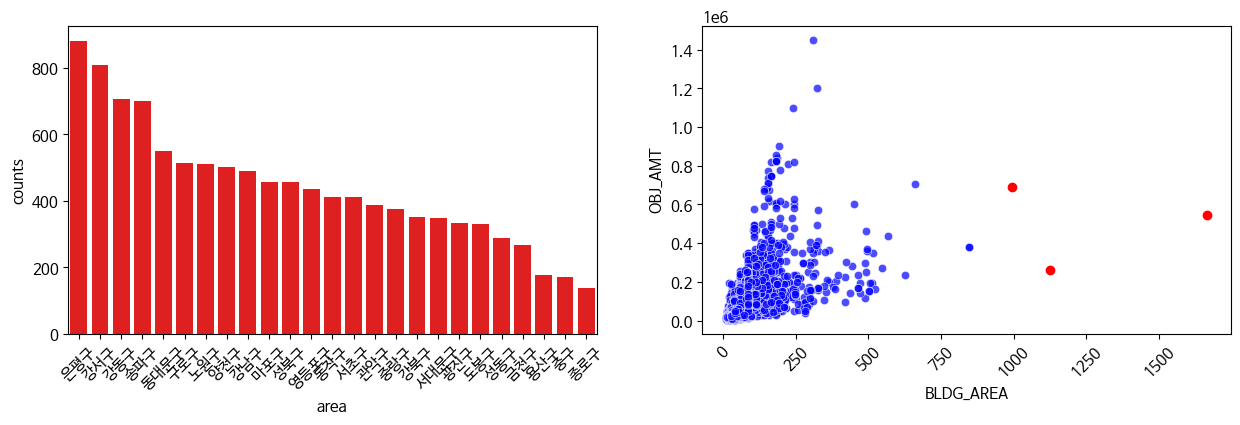

In [111]:
deals_made = estate["SGG_NM"].value_counts().reset_index()
deals_made.columns = ["area","counts"]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

# 두 개의 서브플롯이 있기에 기울이기 코드를 쓰려면 첫 번째 서브플롯을 기울이라고 지정해 주어야 한다.
sns.barplot(deals_made, x = "area", y = "counts", color = 'red',ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)

# 전역 플롯의 변화를 주면 마지막 서브플롯에만 적용된다.
high_vals = estate['BLDG_AREA'] >= 900
sns.scatterplot(data = estate, x = "BLDG_AREA", y = 'OBJ_AMT', color = 'blue', alpha = 0.7 ,ax = ax[1])
ax[1].scatter(estate['BLDG_AREA'][high_vals], estate["OBJ_AMT"][high_vals], color = 'red') # 빨간색으로 강조해줄 점 - matplotlib 사용
plt.xticks(rotation = 45)

plt.show()

# 복합 시각화

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FuncFormatter
import pandas as pd
import numpy as np

In [162]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- https://matplotlib.org/stable/api/spines_api.html
- https://seaborn.pydata.org/generated/seaborn.catplot.html
- https://matplotlib.org/stable/api/ticker_api.html

In [163]:
def major_formatter(x, pos):
    return "%.2f$" % x                      #문자열 포멧팅 메서드 - x를 소수점 두자리까지 나타내고 $표시를 붙여라 라는 뜻.
formatter = FuncFormatter(major_formatter) # ??? FuncFormatter?

In [175]:
  # 평균과 그에 따른 자료 뽑기
group_mean = tips.groupby(['day'])['total_bill'].agg("mean")
h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(min(group_mean.sort_values(ascending = False)),2)
print(h_mean)

17.15


<ipython-input-175-9fd1d6cfde1d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby(['day'])['total_bill'].agg("mean")


높이 17.682741935483868 너비 0.8
높이 17.15157894736842 너비 0.7999999999999999
높이 20.441379310344825 너비 0.7999999999999998
높이 21.41 너비 0.7999999999999998
높이는  17.682741935483868
높이는  17.15157894736842
높이는  20.441379310344825
높이는  21.41


<ipython-input-176-eb03b733665c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)
<ipython-input-176-eb03b733665c>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45)


(-2.0, 25.0)

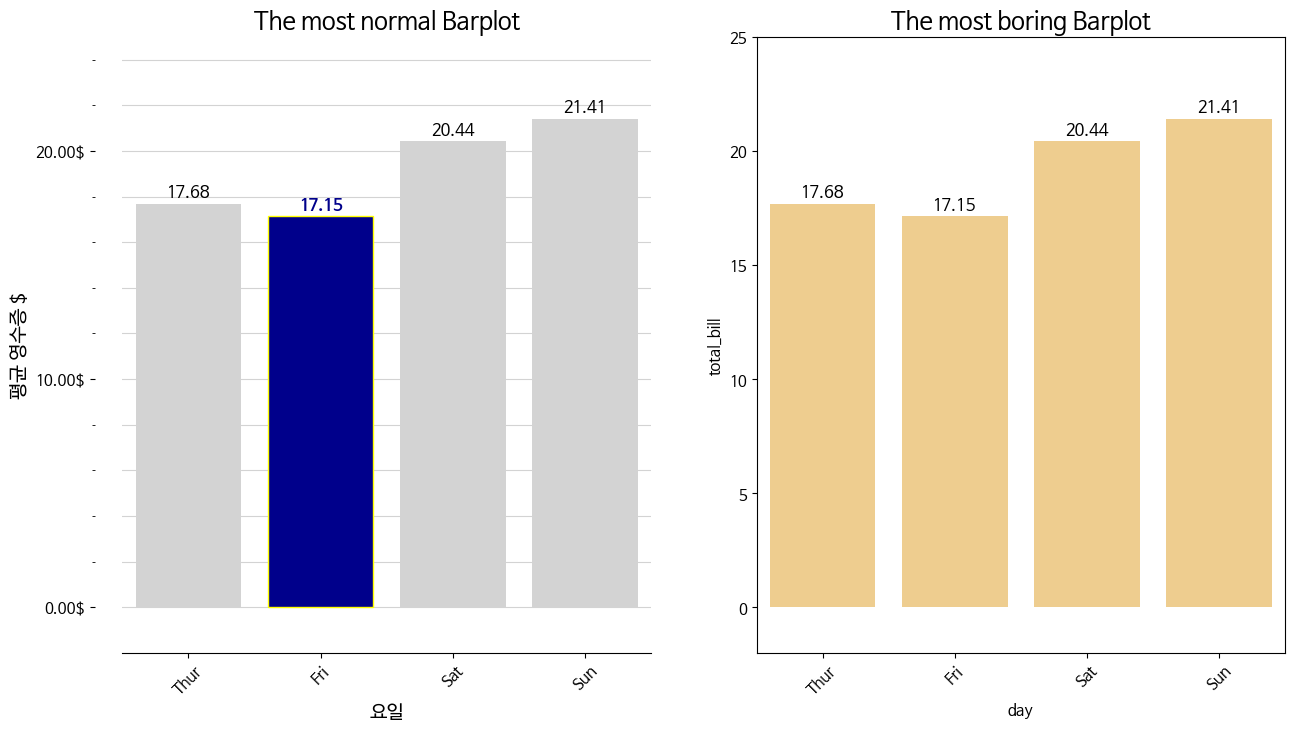

In [176]:
# 객체 지향 선언
fig, ax = plt.subplots(ncols = 2, figsize = (15,8))

sns.barplot(data = tips,
            x = 'day',
            y = 'total_bill',
            errorbar = None,
            alpha = 1,
            zorder = 2,
            color = 'lightgray',
            ax = ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)

#여기가 중요한 포인트. - bar 하나하나가 인스턴스. 글자를 올리고 싶다면 각각 따로따로 지정해줘야 한다.
#클래스의 옵션을 조정해 원하는 값을 출력한다.
#  ax[0].text(i.get_x() + i.get_width()/2, height + 1, height , ha = 'center', size = 12) 를 해석하면 무슨 뜻인지 아는가?
# i.get_x() + i.get_width()/2는 글자가 적힐 x좌표를,  height + 1는 글자가 적힐 y좌표를, height는 쓰여질 글귀를 의미한다.

for p in ax[0].patches:
  # print("여기 확인 필요:", p, type(p))
  print("높이", p.get_height(), "너비", p.get_width())
  height = np.round(p.get_height(), 2)
  fontweight = "normal"
  color = "k"
  if h_mean == height:
    fontweight = "bold"
    color = "darkblue"
    p.set_facecolor(color)
    p.set_edgecolor("yellow")

  ax[0].text(p.get_x() + p.get_width()/2, height + 0.3, height , ha = 'center', size = 12, fontweight = fontweight, color = color)


ax[0].set_title('The most normal Barplot', size = 17) # 제목 추가하기
ax[0].set_ylim(-2,25) #높이 제한 부여, 이 경우엔 사실상 범위 증가.

  # 옵션 설정 - 테두리 없애기 (spines)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)

  # 옵션 설정 - Y축 왼쪽으로 밀기 (spines)
ax[0].spines['left'].set_position(("outward", 20))

  # y축 정리
ax[0].yaxis.set_major_locator(MultipleLocator(10)) # y축 간격을 나누어주는 큰 눈금. 그 간격을 10으로 정한다.
ax[0].yaxis.set_major_formatter(formatter) # 20.00$ 식으로 ylabel을 바꿔준다.
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5)) # 큰 눈금 사이를 나누어주는 작은 눈금. 그 간격은 5로 정한다.

  # 각 축 라벨 정리
ax[0].set_ylabel("평균 영수증 $", fontsize = 14 )
ax[0].set_xlabel("요일", fontsize = 14 )

  # 그리드 설정
ax[0].grid(axis = "y", which = "major", color = 'lightgray')
ax[0].grid(axis = "y", which = "minor", color = 'lightgray')

  # 특정한 Bar만 대조(강조)하고 싶을 때
ax[0]


#----------------------------------------------------------------------------------------------------------------------------------

#그냥 Barplot

sns.barplot(data = tips,
            x = 'day',
            y = 'total_bill',
            errorbar = None,
            alpha = 0.5,
            zorder = 2,
            color = 'orange',
            ax = ax[1])

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45)

#여기가 중요한 포인트. - bar 하나하나가 인스턴스. 글자를 올리고 싶다면 각각 따로따로 지정해줘야 한다.
#클래스의 옵션을 조정해 원하는 값을 출력한다.
#  ax[0].text(i.get_x() + i.get_width()/2, height + 1, height , ha = 'center', size = 12) 를 해석하면 무슨 뜻인지 아는가?
# i.get_x() + i.get_width()/2는 글자가 적힐 x좌표를,  height + 1는 글자가 적힐 y좌표를, height는 쓰여질 글귀를 의미한다.

for i in ax[1].patches:
  print("높이는 ",i.get_height())
  height = np.round(i.get_height(),2)
  ax[1].text(i.get_x() + i.get_width()/2, height + 0.3, height , ha = 'center', size = 12)

# 옵션 설정
ax[1].set_title('The most boring Barplot', size = 17) # 제목 추가하기
ax[1].set_ylim(-2,25) #높이 제한 부여, 이 경우엔 사실상 범위 증가.

In [ ]:
#